In [72]:
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sn
import lib.gpcalc as gpc

def f_2_m(f,R=0):
    # Meter til Fot
    if R:
        return 3.2808399*f

    # Fot til Meter
    else:
        return 0.3048*f


  

In [53]:
ds = pd.read_csv("source/dataset_H.csv")
helilist =[]
for i, row in ds.iterrows():
    if row[-1] == "H":
        helilist.append(i)
    if not row[4] > 0:
        print(row[4])
        ds = ds.drop(i)

In [54]:
ds

,date,time,lat,lon,height,temp,type
0,20080205,6:57,60.291,5.222,2499.992,NaN,FW
1,20080213,16:30,69.980,23.360,13000.000,NaN,FW
2,20080222,8:00,61.390,5.020,3800.000,NaN,FW
3,20080404,17:30,60.291,5.220,3000.000,NaN,FW
4,20080715,12:15,69.680,18.920,10000.000,NaN,FW
...,...,...,...,...,...,...,...
233,20180925,15:10,67.270,14.350,3500.000,NaN,FW
234,20181008,2:00,63.700,9.604,3200.000,NaN,FW
235,20181030,20:42,59.350,6.017,8000.000,NaN,FW
236,20181130,18:12,60.291,5.222,6000.000,NaN,FW


In [55]:
dsS = ds.copy()
dsW = ds.copy()

In [56]:
ds

,date,time,lat,lon,height,temp,type
0,20080205,6:57,60.291,5.222,2499.992,NaN,FW
1,20080213,16:30,69.980,23.360,13000.000,NaN,FW
2,20080222,8:00,61.390,5.020,3800.000,NaN,FW
3,20080404,17:30,60.291,5.220,3000.000,NaN,FW
4,20080715,12:15,69.680,18.920,10000.000,NaN,FW
...,...,...,...,...,...,...,...
233,20180925,15:10,67.270,14.350,3500.000,NaN,FW
234,20181008,2:00,63.700,9.604,3200.000,NaN,FW
235,20181030,20:42,59.350,6.017,8000.000,NaN,FW
236,20181130,18:12,60.291,5.222,6000.000,NaN,FW


In [57]:
nr=0

for i, row in ds.iterrows():
    month = int(str(row[0])[4:-2])
    # Definer vinterhalvåret som Oktober-Mars, sommer som April til September
    if month < 4 or month > 9:
        dsS=dsS.drop(i)
    else:
        dsW=dsW.drop(i)                
                
print(i+1,nr)

238 0


In [58]:
HTI_cases = dsW.copy()

In [59]:
def C(K):
    return round(K - 273.15,2)

In [60]:
"""nr = 0
HTI_list = []
temp_list = []
RH_list = []
for i, row in dsW.iterrows():
    if row[0] > 20161108:
        date = str(row[0])
        if date == "20180528":
            HTI_cases = HTI_cases.drop(i)
            continue
        YYYY = date[:4]
        MM = date[4:6]
        DD = date[6:]
        
        hour = int(row[1].split(":")[0])
        minute = int(row[1].split(":")[1])
        
        if minute < 30:
            hour = hour
        else: 
            hour += 1
        
        if hour < 6:
            term = "00"
        elif hour < 12:
            term = "06"
        elif hour < 18:
            term = "12"
        else:
            term = "18"
        filename = "https://thredds.met.no/thredds/dodsC/meps25epsarchive/%s/%s/%s/meps_mbr0_pp_2_5km_%sT%sZ.nc"%(YYYY,MM,DD,date,term)
        file = netCDF4.Dataset(filename, "r")
        
        lat = row[2]
        lon = row[3]
        proj = pyproj.Proj(file.variables["projection_lambert"].proj4)

        # Compute projected coordinates of lat/lon point
        X, Y = proj(lon, lat)

        # Find nearest neighbour
        x = file.variables["x"][:]
        y = file.variables["y"][:]
        Ix = np.argmin(np.abs(x - X))

        Iy = np.argmin(np.abs(y - Y))
        
        It = hour - int(term)
        if row[4]> 0:
            nr += 1
        if 2000 <= row[4] and row[4] <= 3000:
            HTI =  file.variables["helicopter_triggered_index"][It, Iy, Ix]
            temp = C(file.variables["air_temperature_2m"][It,0, Iy, Ix])
            RH = file.variables["relative_humidity_2m"][It,0, Iy, Ix]
            print(date,row[1],row[4], HTI,temp, RH)
            HTI_list.append(HTI)
            temp_list.append(temp)
            RH_list.append(RH)
        else:
            HTI_cases = HTI_cases.drop(i)
    else:
        HTI_cases = HTI_cases.drop(i)
print(nr)
""";

In [132]:
"""infile=open("pp_paths.txt")
average_HTI = np.zeros((929,719))
new_HTI = np.zeros((929,719))
for file in infile.readlines():
    # Define date from filepath
    file = file.strip()
    date = file[-15:-3]
    if date == "20170907T00Z":
        break
    filename = "http://thredds.met.no/thredds/dodsC/meps25epsarchive" + file[-45:]
    file = netCDF4.Dataset(filename,"r")
    HTI =  file.variables["helicopter_triggered_index"][0:6,:,:]
    for i in range(6):
        new_HTI += HTI[i,:,:]
    average_HTI += new_HTI/6
    new_HTI*=0
    """;

In [151]:
a = np.random.random((5,5))


array([[0.70758519, 0.69977784, 0.98978869, 0.52608319, 0.86739635],
       [0.36855046, 0.71486129, 0.98509792, 0.63890336, 0.93807092],
       [0.08305197, 0.74991861, 0.16604603, 0.43478582, 0.02605498],
       [0.59493885, 0.75340074, 0.02821213, 0.73552022, 0.73256489],
       [0.24218036, 0.53881911, 0.62233144, 0.05459452, 0.41687305]])

In [159]:
print(a[2-2:2+3,2-2:2+3])
print(a)
print(ceil(5/2),floor(5/2))

[[0.70758519 0.69977784 0.98978869 0.52608319 0.86739635]
 [0.36855046 0.71486129 0.98509792 0.63890336 0.93807092]
 [0.08305197 0.74991861 0.16604603 0.43478582 0.02605498]
 [0.59493885 0.75340074 0.02821213 0.73552022 0.73256489]
 [0.24218036 0.53881911 0.62233144 0.05459452 0.41687305]]
[[0.70758519 0.69977784 0.98978869 0.52608319 0.86739635]
 [0.36855046 0.71486129 0.98509792 0.63890336 0.93807092]
 [0.08305197 0.74991861 0.16604603 0.43478582 0.02605498]
 [0.59493885 0.75340074 0.02821213 0.73552022 0.73256489]
 [0.24218036 0.53881911 0.62233144 0.05459452 0.41687305]]
3 2


In [62]:
ands = pd.read_csv("source/analysis_dataset.csv")
ands

,date,time,route,height,temp
0,20120422,19:40,Skarv offshore - Brønnøy,3000.0,NaN
1,20121230,13:08,Brønnøy - Polar Pioneer,NaN,0.0
2,20130208,19:00,Snørre A offshore-Florø,3000.0,NaN
3,20130318,20:20,Sola-Maersk Rearcher offshore offshore,2000.0,NaN
4,20130503,6:30,Flesland-Troll,2000.0,NaN
5,20131221,15:45,Sola-Leif,NaN,NaN
6,20141209,16:15,Ekofisk - Sola,7000.0,-2.0
7,20151113,12:52,Åsgård C offshore - Kvernberget,3000.0,NaN
8,20151127,13:09,Asgard C - Kvernberget offshore,3000.0,NaN
9,20171123,13:35,Varg,3000.0,-2.0


In [63]:
flesland_coord = (60.291,5.222)
sola_coord = (58.878,5.632)
gardermoen_coord = (60.199,11.100)

def distanse(start,slutt):
    """
    Regner ut distansen fra start-koordinatene (2-tuple)
    til slutt-koordinatene (2-tuple)
    og returnerer denne (1 float)
    """
    x1,y1 = start
    x2,y2 = slutt
    dist = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    return dist



In [84]:
heightlist = [[] for _ in range(12)]
gardermoen = []
sola = []
flesland = []
cutoff = 1
dates = {}
for i, row in ds.iterrows():
    month_index= int(str(row[0])[4:-2])-1
    lat = row[2]
    lon = row[3]
    event_coords = (lat,lon)
    height = row[4]
    if height > 0:
        heightlist[month_index].append(height)
        if distanse(event_coords,flesland_coord) < cutoff:
            flesland.append(i)
        elif distanse(event_coords,sola_coord) < cutoff:
            sola.append(i)
        elif distanse(event_coords,gardermoen_coord) < cutoff:
            gardermoen.append(i)
    dates[row[0]] = 1
nr = 0
for i in heightlist:
    nr += len(i)
print(nr)


238


In [65]:
unique_coords = []
for i, row in ds.iterrows():
    lat = round(row[2],2)
    lon = round(row[3],2)
    event_coords = (lat,lon)
    if event_coords not in unique_coords:
        unique_coords.append(event_coords)
print(len(unique_coords))
with open("unique_coords.txt","w") as outfile:
    for coords in unique_coords:
        outfile.write(str(coords[0]) +","+str(coords[1])+"\n")

57


## These Cell uses Era5 PL and SL

In [66]:
distlist =  []
path = "source/era5/event_data/"
last = ""
nr=0
for i, row in ds.iterrows():
    date = row[0]
    month_index= int(str(date)[4:-2])-1
    lat = row[2]
    lon = row[3]
    time = int(row[1].split(":")[0])
    event_coords = (lat,lon)
    height = row[4]
    
    if not height > 0 or i == 1 :
        distlist.append(np.nan)
        continue
                                                            
    data = netCDF4.Dataset(path+str(date)+str(time)+str(int(round(lat,0)))+str(int(round(lon,0)))+'SingleLayer.nc') 
    dist = height - f_2_m(data.variables["cbh"][0,4,4],1)
    distlist.append(f_2_m(dist))
print(min(distlist),max(distlist))



-2158.569131903412 4541.405867339821


In [67]:
bar = np.linspace(-2100,4500,34)
height = np.zeros(len(bar),dtype = int)
height2 = np.zeros(len(bar),dtype= int)
for j,dist in enumerate(distlist):
    if np.isnan(dist):
        continue
    i = np.argmin(abs(bar-dist))
    height[i] +=1
    if j in helilist:
        height2[i] +=1


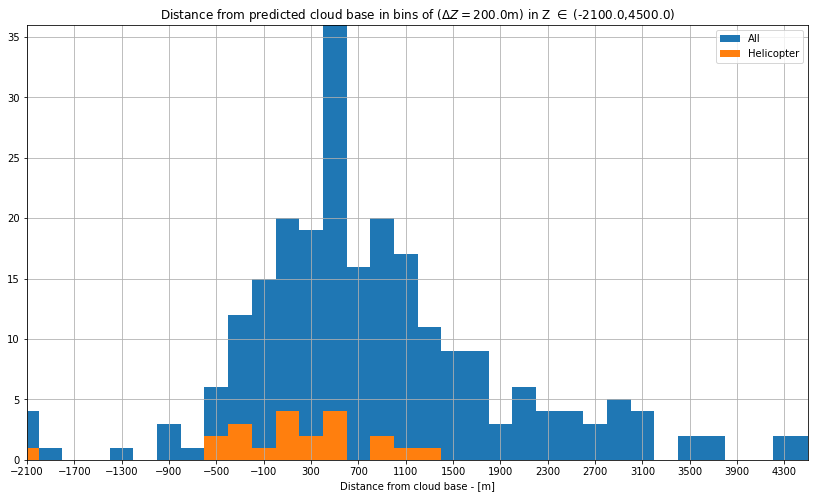

In [68]:
plt.figure(figsize=(14,8))
ax = plt.axes()
plt.grid()
dt = (max(bar)-min(bar))/(len(bar)-1)

ax.bar(bar,height,width=dt,label="All")
ax.bar(bar,height2,width=dt,label="Helicopter")
plt.xlim((int(min(bar)),int(max(bar))))
plt.ylim(0,max(height))
plt.xlabel(r"Distance from cloud base - [m]")
plt.xticks(range(int(min(bar)),int(max(bar))+1,2*int(dt)))
plt.title("Distance from predicted cloud base in bins of ($\Delta Z = %.1f$m) in Z $\in$ (%.1f,%.1f)"%(dt,min(bar),max(bar)))
plt.legend()
plt.show()


## This Cell uses Model Levels (Correct one?)

In [69]:
def data_from_row(row):
    date = row[0]
    month_index= int(str(date)[4:-2])-1
    lat = row[2]
    lon = row[3]
    time = int(row[1].split(":")[0])
    event_coords = (lat,lon)
    height = row[4]
    
    
    return xa.open_dataset(path+str(date)+str(time)+str(int(round(lat,0)))+str(int(round(lon,0)))+'ModelLevel.nc')

In [73]:
k_list = []
templist = [[] for _ in range(12)]
path = "source/era5/event_data/"
last = ""
nr=0
templistflat_new = []

for i, row in ds.iterrows():
    date = row[0]

    month_index= int(str(date)[4:-2])-1
    lat = row[2]
    lon = row[3]
    time = int(row[1].split(":")[0])
    event_coords = (lat,lon)
    height = row[4]
    
    if not height > 0:
        templistflat_new.append(np.nan)
        k_list.append(np.nan)
        continue
                                                            
    data = xa.open_dataset(path+str(date)+str(time)+str(int(round(lat,0)))+str(int(round(lon,0)))+'ModelLevel.nc')
    mldf= pd.read_csv('table.csv',index_col='n')
    gpc.set_data(data, mldf, 137)
    
    k = -1
    sfx = gpc.get_phi(137)/9.81
    for j in range(136,97,-1):
        if f_2_m(gpc.get_phi(j)[0,2,2]/9.81,1) - f_2_m(sfx[0,2,2],1) - height > 0:
            k = j
            break

    if k == -1:
        print(row)
        templistflat_new.append(np.nan)
        k_list.append(np.nan)
        continue
        
    
    # Define lapse_rate from difference (Tk - Tk-1)/(Zk - Zk-1) (must be k and k + 1 since 136 is lowest level)
    lapse_rate = (data.sel(level=k)['t'][0,2,2]-data.sel(level=k+1)['t'][0,2,2])/(gpc.get_phi(k)[0,2,2]/9.81 - gpc.get_phi(k+1)[0,2,2]/9.81)
    # Gives distance between layers in meters.
    distance = (f_2_m(gpc.get_phi(k+1)[0,2,2]/9.81,1) - f_2_m(sfx[0,2,2],1) - height)
                                                                                  
    # Temperature from level we know we have passed, times the distance to real level.                                                                            
    temp = ((data.sel(level=k+1)['t'][0,2,2] - 273.15) + lapse_rate * distance ).values
    
    #print((((data.sel(level=k+1)['t'][0,2,2] + data.sel(level=k)['t'][0,2,2])/2 - 273.15) - lapse_rate*distance).values)
    nr +=1

    if temp < -30:
        print(row)
        templistflat_new.append(temp)
        k_list.append(k)
        continue
    k_list.append(k)
    templistflat_new.append(temp)
    templist[month_index].append(temp)
print(nr)

date      20080213
time         16:30
lat          69.98
lon          23.36
height       13000
temp           NaN
type            FW
Name: 1, dtype: object
date      20180817
time         18:10
lat         59.985
lon         21.441
height       18000
temp           NaN
type            FW
Name: 227, dtype: object
237


In [74]:
### Add k-correction (reducing distance from k-th level to case-height) (Now only does lapse-rate calculation)

        

In [76]:
heightlistflat=[]
errlist = []
heliheightlist = []
heightlist = [[] for _ in range(12)]
for i, row in ds.iterrows():
    k = k_list[i]
    height = row[4]
    if  height > 0 and i != 227:
        month_index= int(str(row[0])[4:-2])-1
        k = int(k)
        data = data_from_row(row)
        mldf= pd.read_csv('table.csv',index_col='n')
        gpc.set_data(data, mldf, 137)
        sfx = gpc.get_phi(137)/9.81
        current = (f_2_m(gpc.get_phi(k)[0,2,2]/9.81,1) - f_2_m(sfx[0,2,2],1)).values
        heightlistflat.append(current)
        errlist.append(f_2_m(current-height))
        if row[-1] == "H":
            heliheightlist.append(current)
        heightlist[month_index].append(height)
    else:
        heightlistflat.append(np.nan)
        errlist.append(np.nan)
print(min(errlist),np.nanmean(errlist),max(errlist))
heightlist.append(heliheightlist)

0.1573333505968678 57.902463928059234 240.70043773764792


In [77]:
templistflat = []
templist = [[] for _ in range(12)]
helitemplist = []
for i, row in ds.iterrows():
    k = k_list[i]
    if  row[4] > 0 and i != 227 and i != 1:
        month_index= int(str(row[0])[4:-2])-1
        k = int(k)
        data = data_from_row(row)
        temp = (data.sel(level=k)['t'][0,2,2]-273.15).values
        templistflat.append(temp)
        templist[month_index].append(temp)
        if row[-1] == "H":
            helitemplist.append(temp)
    else:
        templistflat.append(np.nan)
templist.append(helitemplist)

In [78]:
bar = np.linspace(-23,19,43)
height = np.zeros(len(bar),dtype = int)
height2 = np.zeros(len(bar),dtype=int)
for j,temp in enumerate(templistflat):
    if np.isnan(temp):
        continue
    i = np.argmin(abs(bar-temp))
    height[i] +=1
    if j in helilist:
        height2[i] +=1

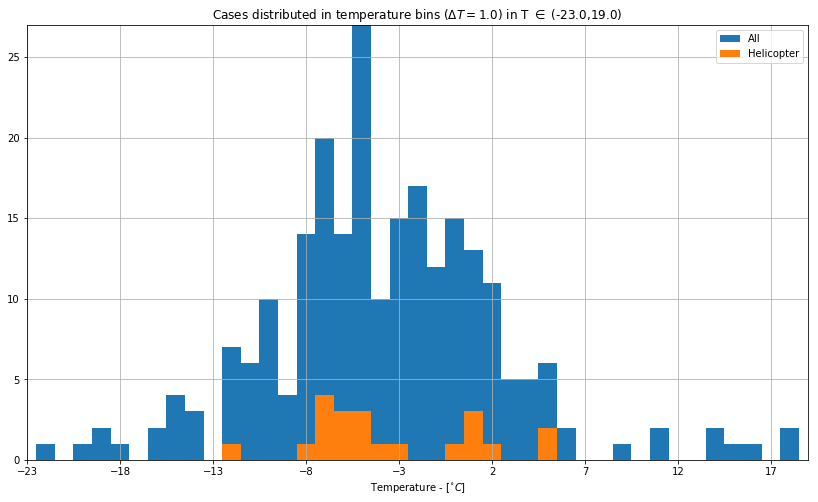

236


In [79]:
plt.figure(figsize=(14,8))
ax = plt.axes()
plt.grid()
ax.bar(bar,height,width=1,label ="All")
ax.bar(bar,height2,width=1, label ="Helicopter")
plt.xticks(range(int(min(bar)),int(max(bar))+1,5))
plt.xlim((int(min(bar)),int(max(bar))))
plt.ylim(0,max(height))
plt.xlabel(r"Temperature - [$^{\circ}C$]")
dt = (max(bar)-min(bar))/(len(bar)-1)
plt.title("Cases distributed in temperature bins ($\Delta T = %.1f$) in T $\in$ (%.1f,%.1f)"%(dt,min(bar),max(bar)))
plt.legend()
plt.grid(True)
plt.show()

print(sum(height))

In [80]:
bar = np.linspace(-23,19,43)
height = np.zeros(len(bar),dtype = int)
height2 = np.zeros(len(bar),dtype=int)
for j,temp in enumerate(templistflat_new):
    if np.isnan(temp):
        continue
    i = np.argmin(abs(bar-temp))
    height[i] +=1
    if j in helilist:
        height2[i] +=1

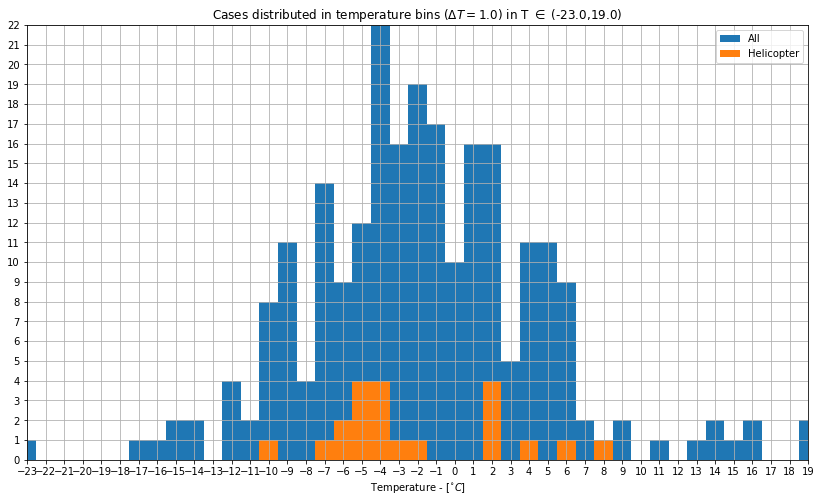

237


In [81]:
plt.figure(figsize=(14,8))
ax = plt.axes()
plt.grid()
ax.bar(bar,height,width=1,label ="All")
ax.bar(bar,height2,width=1, label ="Helicopter")
plt.xticks(range(int(min(bar)),int(max(bar))+1,1))
plt.yticks(range(int(min(height)),int(max(height))+1,1))

plt.xlim((int(min(bar)),int(max(bar))))
plt.ylim(0,max(height))
plt.xlabel(r"Temperature - [$^{\circ}C$]")
dt = (max(bar)-min(bar))/(len(bar)-1)
plt.title("Cases distributed in temperature bins ($\Delta T = %.1f$) in T $\in$ (%.1f,%.1f)"%(dt,min(bar),max(bar)))
plt.legend()
plt.grid(True)
plt.show()

print(sum(height))

In [76]:
bar = np.linspace(-20,20,9)
height = np.zeros(len(bar),dtype = int)
height2 = np.zeros(len(bar),dtype=int)
for j,temp in enumerate(templistflat_new):
    if np.isnan(temp) or j == 263:
        continue
    i = np.argmin(abs(bar-temp))
    height[i] +=1
    if j in helilist:
        height2[i] +=1

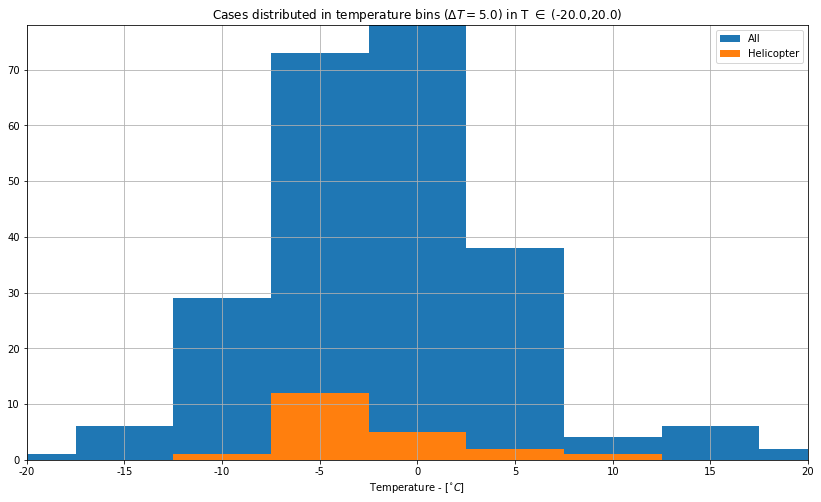

237


In [85]:
plt.figure(figsize=(14,8))
ax = plt.axes()
plt.grid()
ax.bar(bar,height,width=5,label ="All")
ax.bar(bar,height2,width=5, label ="Helicopter")
plt.xticks(range(int(min(bar)),int(max(bar))+1,5),range(int(min(bar)),int(max(bar))+1,5))

plt.xlim((int(min(bar)),int(max(bar))))
plt.ylim(0,max(height))
plt.xlabel(r"Temperature - [$^{\circ}C$]")
dt = (max(bar)-min(bar))/(len(bar)-1)
plt.title("Cases distributed in temperature bins ($\Delta T = %.1f$) in T $\in$ (%.1f,%.1f)"%(dt,min(bar),max(bar)))
plt.legend()
plt.grid(True)
plt.show()

print(sum(height))

[-3.0, -3.0, -1.0, 1.0]


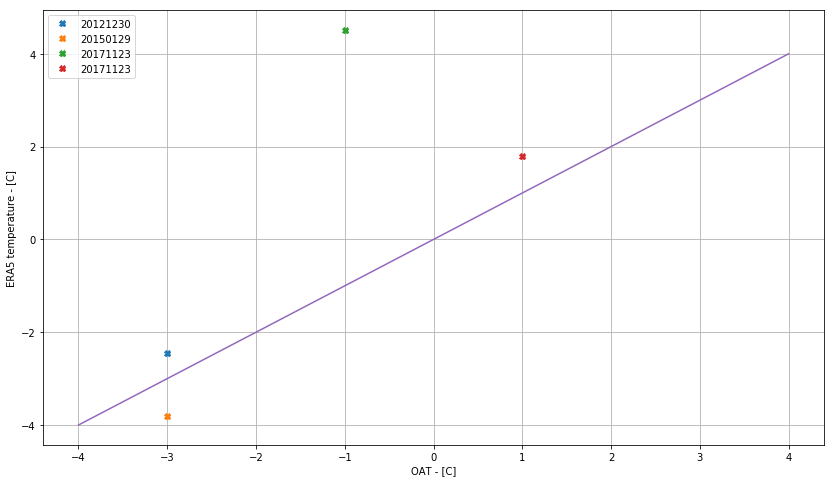

In [86]:
plt.figure(figsize=(14,8))
ax = plt.axes()
y=[]
SSres = 0
SStot = 0
for i, row in ds.iterrows():
    if abs(row[-2]) + 1 > 0:
        y.append(row[-2])
        SSres += (row[-2] - templistflat_new[i])**2
        ax.plot(row[-2],templistflat_new[i],"X",label=str(row[0]))
ymean = np.mean(y)
print(y)
for y_ in y:
    SStot += (y_ - ymean)**2
    
ax.plot(np.linspace(-4,4,100),np.linspace(-4,4,100))
ax.legend()
plt.grid()


ax.set_xlabel("OAT - [C]" )
ax.set_ylabel("ERA5 temperature - [C]")
plt.show()

37


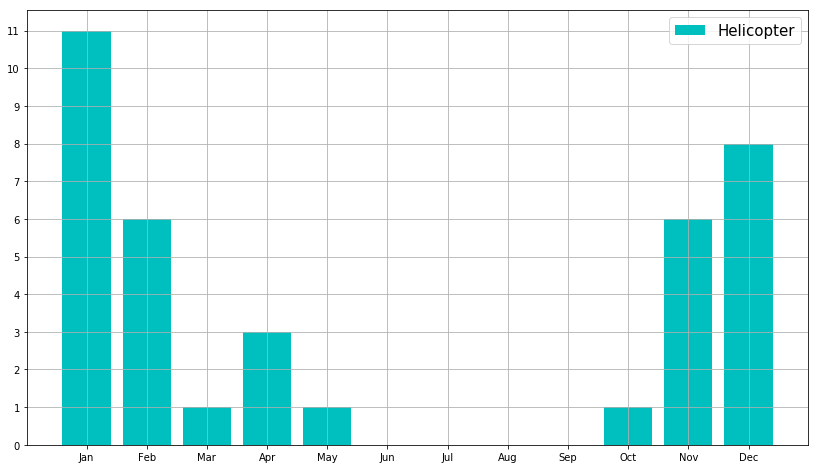

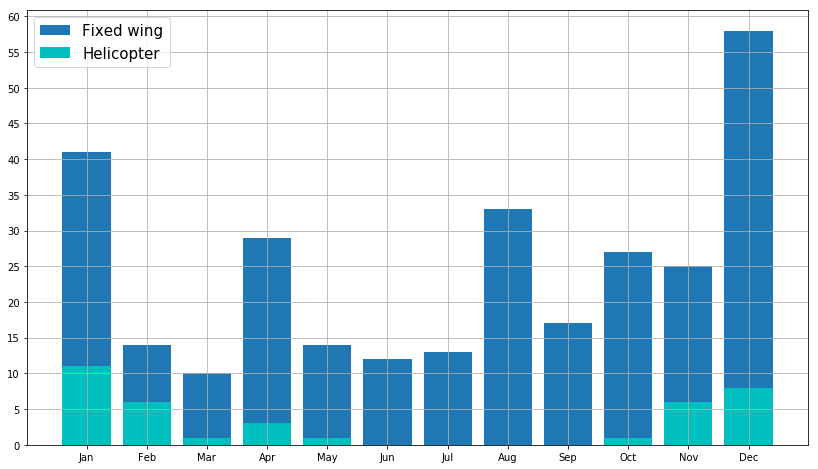

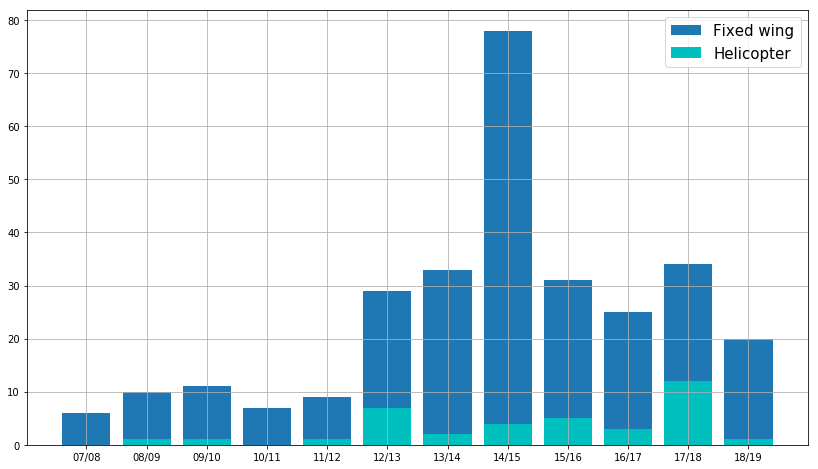

In [24]:
helicopter_cases = np.zeros(12,dtype=int)
fixed_wing_cases = np.zeros(12,dtype=int)
H_variation = np.zeros(12,dtype=int)
FW_variation =np.zeros(12,dtype=int)

for i, row in ds.iterrows():
    year_index= int(str(row[0])[:4])-2008
    month_index= int(str(row[0])[4:-2])-1
    if month_index > 5:
        year_index+=1
    if row[-1] == "H":
        helicopter_cases[month_index] +=1 
        H_variation[year_index] += 1
    else:
        fixed_wing_cases[month_index] += 1
        FW_variation[year_index] += 1

for i, row in ands.iterrows():
    year_index= int(str(row[0])[:4])-2008
    month_index= int(str(row[0])[4:-2])-1
    if month_index > 6:
        year_index+=1
    helicopter_cases[month_index] +=1
    H_variation[year_index] += 1
print(sum(H_variation))

xlist = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
season_list = []
for i in range(7,19):
    season_list.append("%2.2d/%2.2d"%(i,i+1))

plt.figure(figsize=(14,8))
ax = plt.axes()
ax.bar(range(1,13),helicopter_cases,color="c",label="Helicopter")
ax.legend(loc="best",fontsize=15)
plt.yticks(range(0,max(helicopter_cases)+1))
plt.xticks(range(1,13),xlist)
plt.grid()

plt.figure(figsize=(14,8))
ax = plt.axes()

ax.bar(range(1,13),fixed_wing_cases+helicopter_cases,label="Fixed wing")
ax.bar(range(1,13),helicopter_cases,color="c",label="Helicopter")
ax.legend(loc="best",fontsize=15)
plt.yticks(range(0,max(fixed_wing_cases)+max(helicopter_cases)+1,5))
plt.xticks(range(1,13),xlist)
plt.grid()


plt.figure(figsize=(14,8))
ax = plt.axes()

ax.bar(range(1,13),FW_variation+H_variation,label="Fixed wing")
ax.bar(range(1,13),H_variation,color="c",label="Helicopter")
plt.xticks(range(1,13),season_list)

ax.legend(loc="best",fontsize=15)
plt.grid()


plt.show()

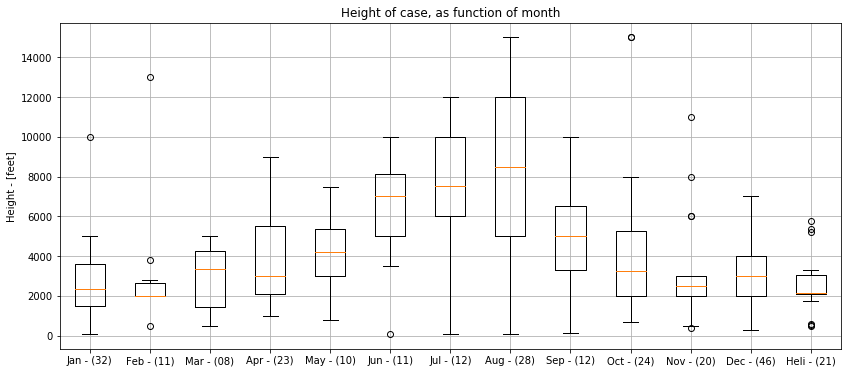

In [25]:
plt.figure(figsize=(14,6))
ax = plt.axes()
ax.boxplot(heightlist)

xlist = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Heli"]
for i,list_ in enumerate(heightlist):
    xlist[i] = xlist[i] + " - (%2.2d)"%len(list_)

plt.xticks(range(1,len(xlist)+1),xlist)
plt.grid()
plt.ylabel("Height - [feet]")
plt.title("Height of case, as function of month")
plt.show()


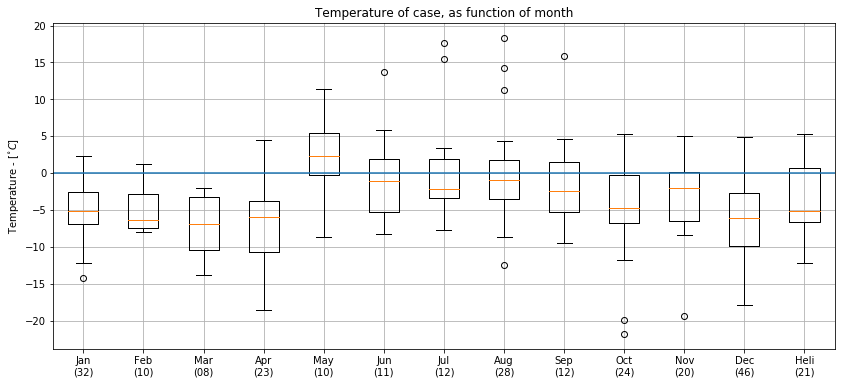

In [26]:
plt.figure(figsize=(14,6))
ax = plt.axes()
ax.boxplot(templist)
xlist = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Heli"]
for i,list_ in enumerate(templist):
    xlist[i] = xlist[i] + "\n(%2.2d)"%len(list_)

ax.plot(range(0,15),np.zeros(15))
nr = 0

plt.xticks(range(1,14),xlist)
plt.ylabel(r"Temperature - [$^{\circ}C$]")
plt.grid()
plt.title("Temperature of case, as function of month")

plt.show()

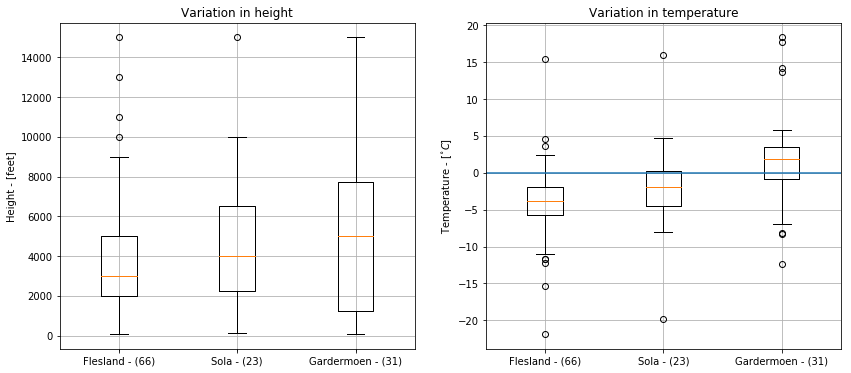

In [30]:


height_at_airports = [[] for _ in range(3)]
temp_at_airports = [[] for _ in range(3)]
for i,row in ds.iterrows():
    if i in flesland:
        height_at_airports[0].append(row[4])
        temp_at_airports[0].append(templistflat[i])
    elif i in sola:
        height_at_airports[1].append(row[4])
        temp_at_airports[1].append(templistflat[i])
    elif i in gardermoen:
        height_at_airports[2].append(row[4])
        temp_at_airports[2].append(templistflat[i])
        
xlist = ["Flesland","Sola","Gardermoen"]
for i,list_ in enumerate(height_at_airports ):
    xlist[i] = xlist[i] + " - (%2.2d)"%len(list_)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.boxplot(height_at_airports)
ax1.set_title("Variation in height")
ax1.set_ylabel("Height - [feet]")
ax1.set_xticks(range(1,4),xlist)
ax1.set_xticklabels(xlist)
ax1.grid()
ax2.boxplot(temp_at_airports )
ax2.set_ylabel(r"Temperature - [$^{\circ}C$]")
ax2.set_title("Variation in temperature")
ax2.set_xticks(range(1,4))
ax2.set_xticklabels(xlist)
ax2.grid()
ax2.plot(range(5),np.zeros(5))
plt.show()


## Climatologies

In [300]:
def plot_climatology(variable):
    months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    gardermoen_clim = np.zeros(12)
    sola_clim = np.zeros(12)
    flesland_clim = np.zeros(12)
    coords = [gardermoen_coord,sola_coord,flesland_coord]
    for m in range(12):
        month = "%2.2d"%(m+1)

        file = netCDF4.Dataset( "era5/climatologies/"+months[m]+variable+'.nc', "r")
        x = file.variables["latitude"][:]
        y = file.variables["longitude"][:]
        X,Y = coords[0]
        Ix = np.argmin(np.abs(x - X))
        Iy = np.argmin(np.abs(y - Y))
        gardermoen_clim[m]=file.variables[variable][Ix,Iy]

        X,Y = coords[1]
        Ix = np.argmin(np.abs(x - X))
        Iy = np.argmin(np.abs(y - Y))
        sola_clim[m]=file.variables[variable][Ix,Iy]

        X,Y = coords[2]
        Ix = np.argmin(np.abs(x - X))
        Iy = np.argmin(np.abs(y - Y))
        flesland_clim[m]=file.variables[variable][Ix,Iy]
    return gardermoen_clim,sola_clim,flesland_clim


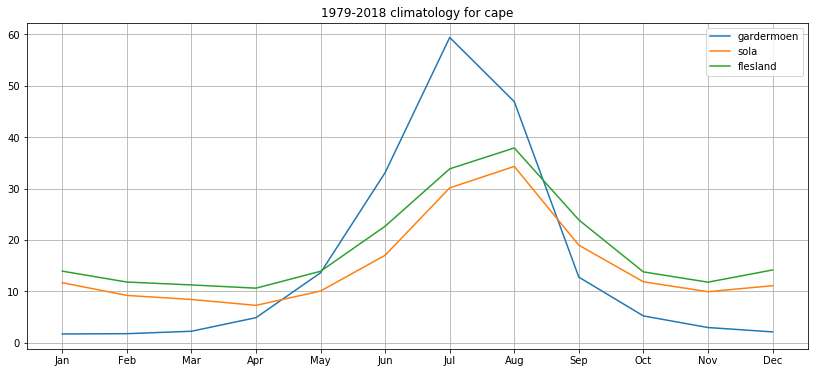

In [303]:
variable = "cape"
gardermoen_clim,sola_clim,flesland_clim=plot_climatology(variable)
plt.figure(figsize = (14,6))
ax = plt.axes()
plt.title("1979-2018 climatology for %s"%variable)
ax.plot(gardermoen_clim,label="gardermoen")
ax.plot(sola_clim,label = "sola")
plt.grid()
ax.plot(flesland_clim,label ="flesland")
plt.xticks(range(12),months)

plt.legend()
plt.show()

116 162


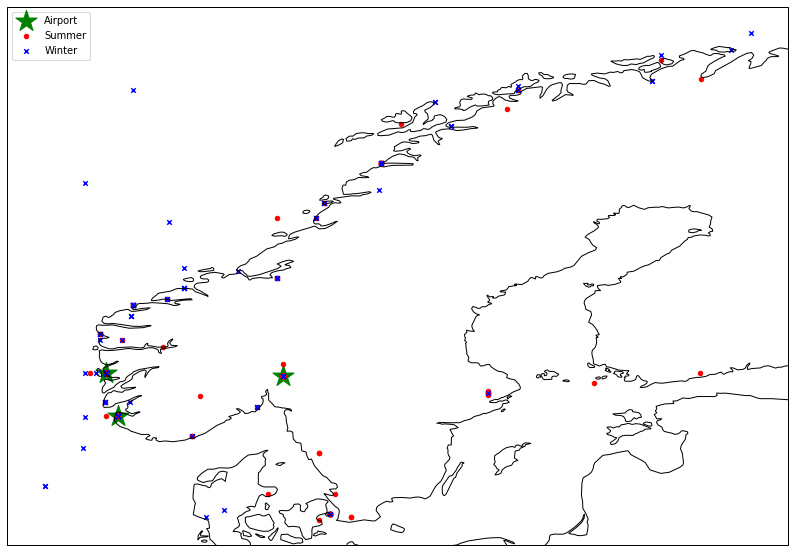

In [240]:
fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection=ccrs.PlateCarree())


ax.scatter(5.222,60.291,500,"g","*",transform=ccrs.PlateCarree(),label="Airport")
ax.scatter(11.1,60.199,500,"g","*",transform=ccrs.PlateCarree())
ax.scatter(5.632,58.878,500,"g","*",transform=ccrs.PlateCarree())

dsS.plot(ax=ax ,c="r",x="lon",y="lat",kind="scatter",transform=ccrs.PlateCarree(),label="Summer")
dsW.plot(ax=ax ,marker="x",c="b",x="lon",y="lat",kind="scatter",transform=ccrs.PlateCarree(),label="Winter")

ax.coastlines("50m")
ax.legend()
print(len(dsS),len(dsW))